# Calculus

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## What are derivatives and why should you care?

Before deep diving into derivatives, it is reasonable to ask ourselves what we mean when we talk about the derivative of some function with respect to some variable. You may know that the derivative describes the **rate of change** of the function. With 'rate of change' we refer to how quickly the function value increases at some point $x$ when we increase the value of $x$.

A running metaphor we will use is the following. We can imagine a variable $y$ which is formed through applying function $f$ to $x$, i.e. $y = f(x)$. In this case, we call x an **input** and call y an **output**. We are often interested in studying how **sensitive** our outputs are to a change in the inputs, or how much our inputs **influennce** our outputs, as we will get more into it soon. This sensitivity is exactly what is captured by the derivative, e.g. if the derivative of the output with respect to the input is large in some point, we know that output is sensitive to a small change increase around that point. Now, you can picture this as a machine spitting out outputs $y$ controlled with many knobs, where each knob corresponds to a variable $x$. The derivative tells us how sensitive the value our function spits out is to any turn of the knobs. Note that standard functions $f: \mathbb{R} \to \mathbb{R}$ are machines with one knob and spit out one value, but general functions $f: \mathbb{R}^m \to \mathbb{R}^n$ are machines with $m$ knobs and spit out $n$ different values. As we will look at later in this section, we have $m \times n$ derivatives in the latter case, for we can look at the sensitivity of each output to any of the knobs.

More important, perhaps, is the question of why we care about derivatives at all. In the context of machine learning, we are often very interested in a function that describes how well our model performs given our parameters. What we mean with 'doing well' is reflected in later sections, but for now, we presume that we have some measure of 'doing well'. It is common to instead of maximizing performance, minimize the error we make, which are equivalent views on the same thing. Let us, for the sake of simplicity, say that our model parameter is given by $\theta$ and our error rate is given by $E(\theta) = \theta^2 + 4\theta -2$:

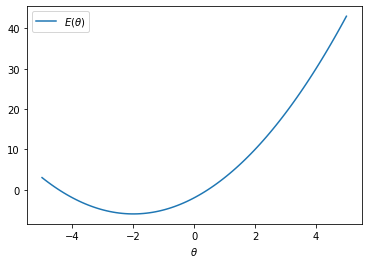

In [22]:
theta = np.linspace(-5, 5, 100)
error = theta**2 + 4 * theta - 2

plt.plot(theta, error, label=r'$E(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

If this function describes our error given our model parameters, we would be very interested in finding the point where this error rate is minimum, which is exactly why we want to use the derivative. We notice that in our minimum (which soon enough will turn out to be given by $\theta=-2$), the rate of change of our function is $0$. Please take your time to verify this, because this point is crucial. As you might remember from a previous calculus course, the derivative of the function $E(\theta)$ is given by $E'(\theta) = 2\theta + 4$:

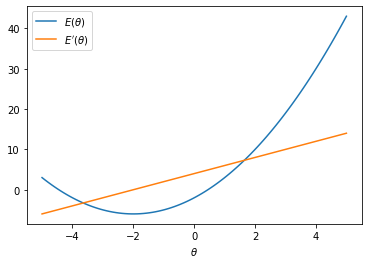

In [21]:
error_der = 2 * theta + 4

plt.plot(theta, error, label=r'$E(\theta)$')
plt.plot(theta, error_der, label=r"$E'(\theta)$")

plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

Here we see that for all points less than $\theta=-2$, indeed the derivative is negative (i.e. the function decreases) and for all points greater than $\theta=-2$, the derivative is positive (i.e. the function increases). It is exactly the minimum point $\theta=-2$ where be function does from decreasing to increasing. If we want to find this point $\theta=-2$ algebraically, we simply solve $\theta + 4 = 0$. 

The following sections will deep dive into how you can find these derivatives. We will first review the univariate case such as the function we just covered. We will then steadily work our way up to higher-dimensional derivatives with the aim of you being able to differentiate any ML/DL type of function. 

We do now want to spend too much time on basic differentiation techniques and rather give you a general approach to differentiation from which things such as the sum rule, product rule, chain rule, et cetera, will follow directly. If you need a refresher on the basic derivative rules, we included them in in a separate chapter. Let us now dive into the actual derivatives!

## Derivatives


Let us start nice and easy with our basic functions over the reals, i.e. functions $f: \mathbb{R} \to \mathbb{R}$. Though this initially may look superfluous, we will introduce a visual way of representing these functions. This new approach will make it easier to consider multivariate functions and is commonplace in machine learning. Consider the function $f$ such that $f: x \mapsto x^2$, i.e. the functions that squares its input. Again, our output is given by $y = f(x) = x^2$. In our example, we can visualize this function as follows: 

The blue squares represent \textbf{values} and the yellow rectangles represent ways to \textbf{determine} a value. The most important insight you should take away is that the sensitivity of $y$ to $x$ is given by the sum of influences of all the paths from $x$ to $y$. In this case, there is only one path, that is through the function $x^2$. Using basic differentiation techniques, we hence observe that:
$$\frac{dy}{dx} = \frac{dx^2}{dx} = 2x.$$




A slightly more \textit{spicy} example if the function $f: \mathbb{R} \to \mathbb{R}$ such that $f: x \mapsto \exp (\sin (x))$.\footnote{If you are not familiar with the $\exp(x)$ function, it is just another way to write $e^x$.} If we make a diagram of this function as above, we can represent it as follows:



    
Please note that we had to introduce a new variable $u := \sin (x)$ that represents the intermediate value found after applying the sine function to $x$. When finding the derivative of $y$ with respect to $x$, we again count all the paths from $x$ to $y$. Again, there is only one path, now going through our intermediate value $u$. In this case, the effect of $x$ on $y$ is equal to the effect of $x$ on $u$ times the effect of $u$ on $y$, i.e.
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$ You may have encountered this separation of derivatives before as the \textbf{chain rule}. These derivatives are quite simple, giving us
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx} = \exp(u) \cdot \cos (x) = \exp (\sin (x)) \cos (x),$$
where we substituted $u = \sin (x)$ in the last step. So, we \textbf{sum} all the paths from $x$ to $y$, and we \textbf{multiply} the intermediate effects, e.g. if $x$ influences $u$ which influences $y$, the influence of $x$ on $y$ is the influence of $x$ on $u$ times the influence of $u$ on $y$.


\subsection{Multivariate derivatives}

Let's go one step further, and consider a function $f: \mathbb{R}^2 \to \mathbb{R}$ such that $f: \begin{bmatrix}x_1 \\ x_2\end{bmatrix} \mapsto x_1x_2^2$. We can again draw this function:


    
In this case, we can consider two derivatives: we can look at the effect of $x_1$ on $y$ and the effect of $x_2$ on $y$. When we can consider multiple derivatives for different variables, we do not write $\frac{dy}{dx_1}$ but rather $\frac{\partial y}{\partial x_1}$, to avoid confusion. We call such a derivative a \textbf{partial derivative}. Considering our earlier metaphor, a derivative in a real function is just the effect of turning a knob of a machine with one knob, whereas a partial derivative is an effect of turning one of the multiple knobs and keeping the other still. Luckily for us, we can still apply our same tricks and count the paths from a variable to $y$. In this case, we have that there is only one path from $x_1$ to $y$, and only one path from $x_2$ to $y$, giving us:
$$\frac{\partial y}{\partial x_1} = \frac{\partial x_1x_2^2}{\partial x_1} = x_2^2,$$
and
$$\frac{\partial y}{\partial x_2} = \frac{\partial x_1x_2^2}{\partial x_2} = 2x_1x_2.$$
Please note that since we only consider the influence of one variable at the time, all the other variables are \textbf{constant} when taking derivatives. What we sometimes do, is write the `full' derivative $\frac{d f}{d\textbf{x}}$ as the following vector:
$$\frac{dy}{d\textbf{x}} = \begin{bmatrix} \frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix}x_2^2 & 2x_1x_2\end{bmatrix}.$$ 


We call this full derivative a \textbf{gradient} in the case we have functions $f: \mathbb{R}^n \to \mathbb{R}$, denoted as $\frac{dy}{d\textbf{x}} = \nabla y (\textbf{x}) = \text{grad } y(\textbf{x})$. However, in the the general case of functions $f: \mathbb{R}^n \to \mathbb{R}^m$ we call the resulting matrix a \textbf{Jacobian}, denoted as $\frac{d\textbf{y}}{d\textbf{x}} = \mathbf{J}_\textbf{y}(\textbf{x})$. The Jacobian is just the matrix which has on its $i$ row all the partial derivatives of $y_i$ with respect to $x_j$, i.e. $\mathbf{J}_{ij} = \frac{\partial y_i}{\partial x_j}$. Hence, since we only have one output here, we have that the Jacobian has only one row.\footnote{For pedagogical reasons, we will call all such higher-order derivatives of $y$ Jacobians and denote them with $\frac{d\textbf{y}}{d\textbf{x}}$, but in practice, most people will just use the word `gradient' here anyway.}

We can also have a function $\textbf{f}: \mathbb{R} \to \mathbb{R}^2$ which maps $\textbf{f}: x \mapsto \begin{bmatrix}x^2 \\ \sqrt{x} \end{bmatrix}.$ In this case, we have that $\textbf{y} = \textbf{f}(x)$ where $\textbf{y}$ is a vector (and hence is written in bold font), and thus we can consider $y_1 = x^2$ and $y_2 = \sqrt{x}$. Drawing this, we find:



    
    
When again looking at the paths, we see that
$$\frac{d y_1}{dx} = \frac{d x^2}{dx} = 2x,$$
and
$$\frac{d y_2}{dx} = \frac{d \sqrt{x}}{dx} = \frac{1}{2\sqrt{x}}.$$
Here we can also group the different derivatives into one matrix:
$$\frac{d\textbf{y}}{dx} = \begin{bmatrix} 2x \\ \frac{1}{2\sqrt{x}} \end{bmatrix}.$$
Please note that if we have a function $f: \mathbb{R}^n \to \mathbb{R}^m$ our Jacobian will be of the shape $m \times n$. 

Now we are finally ready to consider a function with multiple streams of influence. Consider the $y = g(\textbf{h}(x))$, where $\textbf{h}(x) = (x^2, \ln (x))$ and $g(u, v) = uv$. That is, $y$ is found by first calculating intermediate values $u = x^2$ and $v = \ln (x)$ and then finding $y= uv.$ If we draw these functions, we see the following:


    
It is now very clear that the effect of $x$ of $y$ is twofold: both through $u$ and $v$. As mentioned earlier, we need to consider all streams of influence. Specifically, we \textbf{sum} the different paths/effects, i.e.:
$$\frac{d y}{dx} = \frac{\partial y}{\partial u} \frac{du}{dx} + \frac{\partial y}{\partial v} \frac{dv}{dx}.$$
Plugging everything in, we find
$$\frac{d y}{dx} = \frac{dy}{du} \frac{du}{dx} + \frac{dy}{dv} \frac{dv}{dx} = v \cdot 2x + u \cdot \frac{1}{x} = \ln(x) \cdot 2x + x^2 \cdot \frac{1}{x} =  2x (\ln (x) + \frac{1}{2}).$$
You may recognize this as the product rule, now you know where that comes from!

Finishing up, we go over one big example. Suppose $\textbf{f}: \mathbb{R}^3 \to \mathbb{R}^3$ such that $f(x_1, x_2, x_3) = \textbf{h}(\textbf{g}(x_1, x_2, x_3))$, where $\textbf{g}(x_1, x_2, x_3) = (x_1^2x_2^2, \sqrt{x_2x_3})$ and $\textbf{h}(u, v) = (u^2, uv, v^2)$. Try it for yourself! Find $\frac{\partial y_2}{\partial x_2}$. Hint: draw out what happens.

When visualizing this function, we get the following:

    
When counting the paths from $x_2$ to $y_2$, we find two paths: one through $u$ and one through $v$. We hence find
$$\frac{\partial y_2}{\partial x_2} = \frac{\partial y_2}{\partial u} \frac{\partial u}{\partial x_2} + \frac{\partial y_2}{\partial v} \frac{\partial v}{\partial x_2}.$$
Plugging our derivatives, we find
$$\frac{\partial y_2}{\partial x_2} = v \cdot 2x_1^2x_2 + u \cdot \frac{x_3}{2\sqrt{x_2x_3}} = 2x_1^2 x_2 \sqrt{x_2x_3} + \frac{x_1^2 x_2^2x_3}{2\sqrt{x_2x_3}}.$$
Sweet! We now know how to find derivatives in multivariate functions. As you have seen, this approach is quite a time intensive, and sometimes (especially in deep learning) it is not necessary to write out everything by hand like this. This will be the topic of the rest of this section.


## Index notation

One of the most iconic functions in deep learning is the `linear layer', which takes some input $\textbf{x} \in \mathbb{R}^m$ and takes $n$ linear combinations (with different factors) of the inputs. This linear layer can be considered a function $\textbf{f}: \mathbb{R}^m \to \mathbb{R}^n$ such that $y_i = w_{i1}x_1 + \cdots w_{im}x_m = \sum_{j=1}^m, w_{ij} x_j$, where we still write $\textbf{y} = \textbf{f}(\textbf{x})$. We call the $\{w_{ik}\}_{k=1}^m$ the **weights** of the function. Notice that for the entire function $\textbf{f}$ we have $n$ of such sets of weights, i.e. in total $n \times m$ weights. We can write this functions more compactly as $$\textbf{y} = \mathbf{Wx},$$ where $$\mathbf{W} = \begin{bmatrix}w_{11} & w_{12} & \cdots & w_{1m} \\ w_{21} & w_{22} & \cdots & w_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n1} & w_{n2} & \cdots & w_{nm} \end{bmatrix} \in \mathbb{R}^{n \times m}.$$
When we now imagine all the streams of influence found between the $\textbf{y}$ and $\textbf{x}$, we realize that each element $y_i$ is dependent on each variable $x_j$. If you do not see this immediately, please draw out the respective diagram.
    
A consequence of this is that we have a lot of derivatives, namely for each of the $n$ outputs $y_i$ we have $m$ different derivatives (for the $m$ inputs). To make our lives a whole lot easier, we simply determine the derivative of the $i$th element for the $j$th variable and see if what we end up with generalizes. 
We hence wanna find $\frac{\partial y_i}{\partial x_j} = \frac{d}{dx_j} (\sum_{k=1}^m w_{ik}x_k)$. We know that 
$$\frac{d}{dx_j} (\sum_{k=1}^m w_{ik}x_k) = \sum_{k=1}^m \frac{d}{dx_j} w_{ik}x_k.$$ 
Let us know zoom in into one of the terms of the summation, i.e. we only consider $\frac{d}{dx_j} w_{ik}x_k$. If we have that $x_k \neq x_j$, we will always have that $\frac{d}{dx_j} w_{ik}x_k = 0$, because the entire term does not depend on $x_j$. When $x_j = x_k$, however, we see that the derivative is given by $w_{ik}$. We can express this `if-else' statement quite easily mathematically using something called the **Kronecker delta**. The Kronecker delta over two variables $i$ and $j$ is equal to $1$ if $i$ is equal to $j$, and equal to $0$ other, or:
$$\delta_{ij} = \begin{cases}1& \text{ if } i = j \\ 0& \text{ otherwise }\end{cases}$$
Sometimes this is written with so-called **Iverson brackets** as $[i=j]$. These brackets do the same thing, i.e. $[\mathsf{S}] = 1$ if $\mathsf{S}$ is true, else $[\mathsf{S}] = 0$ for any statement $\mathsf{S}$. The most important property (for us) of this Kronecker delta is that
$$\sum_j \delta_{ij} x_j = x_i,$$
i.e. when summing over elements $x_j$, we can filter out $x_i$ by introducing $\delta_{ij}$. Please verify this carefully, for this will be our main workhorse throughout this section.

If we go back to our example, we see that hence our derivative is given by $\frac{d}{dx_j} w_{ik}x_k = \delta_{jk} w_{ik}$ for any combination of $x_j$ and $x_k$. That is, the derivative is equal to $0$ if $x_j$ and $x_k$ are different, and equal to $w_{ik}$ when $x_j$ and $x_k$ are the same. Plugging this back in, we find

$$ \sum_{k=1}^m \frac{d}{dx_j} w_{ik}x_k = \sum_{k=1}^m\delta_{jk} w_{ik}.$$
This we know how to evaluate using our workhorse, and hence we see that
$$\frac{df_i}{dx_j} = \sum_{k=1}^m\delta_{jk} w_{ik} = w_{ij}.$$

Neat! We just found a general approach to taking the derivative of the linear layer and concluded that the effect of the $j$th variable on the $i$th output is given by the weight $w_{ij}$. We can write out the entire Jacobian (where the element in $i$th row, $j$th column is the derivative of $y_i$ with respect to $x_j$) again:
$$\frac{d\textbf{y}}{d\textbf{x}}  = \begin{bmatrix}w_{11} & w_{12} & \cdots & w_{1m} \\ w_{21} & w_{22} & \cdots & w_{2m} \\
\vdots & \vdots & \ddots & \vdots & \\
w_{n1} & w_{n2} & \cdots & w_{nm} \end{bmatrix} \in \mathbb{R}^{n \times m}.$$
But wait! This matrix we recognize from earlier, namely as our matrix $\textbf{W}$. This allows us to write
$$\frac{d\textbf{y}}{d\textbf{x}} = \textbf{W}.$$ We call this approach if finding a single entry of the derivative and then generalizing the `index method'.

Please note that not only did we just derive the derivative of the linear layer, but we found that $\frac{d}{d\textbf{x}} \mathbf{W}\textbf{x} = \mathbf{W}$ for arbitrary matrices and vectors, e.g. we also know now that
$$\frac{d}{d\textbf{v}}\mathbf{(AB + C)v} = \mathbf{AB + C}, $$
by simply remembering that $\mathbf{AB + C = W'}$ for some matrix $\mathbf{W'}$.

Another very common derivative you will encounter is $\frac{d}{d\textbf{x}} \mathbf{a^Tx}$. In this case, we have that $\mathbf{a^Tw}$ is simply a scalar, and hence our Jacobian will be of the shape $(1 \times m)$ if $\textbf{x}$ is $m$-dimensional. Let us again use the index method, and aim to find
$$\frac{d}{dx_j} \mathbf{a^Tx} = \frac{d}{dx_j} \sum_{k=1}^m a_k x_{k} = \sum_{k=1}^m \frac{d}{dx_j} a_k x_k.$$
As before, we see that the derivative is equal to $a_k$ when $k = j$, and equal to zero otherwise, and thus
$$\sum_{k=1}^m \frac{d}{dx_j} a_k x_k = \delta_{jk} a_k = a_j,$$
where we find $a_j$ by applying our workhorse again. This means that the $j$th element of our derivative is given by $a_j$, or the entire derivative is given by $\textbf{a}$. 

But... $\textbf{a}$ is a column vector, where our Jacobian should be a row vector as we argued earlier. Sadly, this problem cannot quite be overcome, and we just need to always check of our answer should be transposed or not. In this case, we see that our Jacobian matches $\mathbf{a^T}$. This is slightly annoying, but luckily our answer is always either correct or needs to be only transposed, and checking it will become second nature soon enough! Let this inconvenience not distract us from the fact that we did just find our new identity though, that is:
$$\frac{d}{d\textbf{x}} \mathbf{a^Tx} = \mathbf{a^T}.$$

Now it is your turn, please try and verify that $\frac{d}{d\textbf{x}} \mathbf{y^Ts A x} = \mathbf{y^TA},$ where $\textbf{x} \in \mathbb{R}^m$, $\mathbf{A} \in \mathbb{R}^{n \times m}$, and $\textbf{y} \in \mathbb{R}^m$. Please do this 1) using index notation, and 2) using our identity friends we have already found. 


We know that $\mathbf{y^TAx}$ is a scalar (why?), and hence the Jacobian will be again of the form $(1 \times m)$ if $\textbf{x}$ is a $m$-dimensional vector. Using index notation, we aim to find $\frac{d}{dx_i} \mathbf{y^TAx}$. We observe that
$$\frac{d}{dx_i} \mathbf{y^T A x} = \frac{d}{dx_i} \sum_{k=1}^n \sum_{j=1}^m y_{k}A_{kj}x_j = \sum_{k=1}^n \sum_{j=1}^m \frac{d}{dx_i} y_{k}A_{kj}x_j.$$
Again, since $y_kA_{kj}$ are just scalars, we know that the derivative is simply found by $$\frac{d}{dx_i} y_k A_{kj}x_j = \delta_{ij} y_k A_{kj}.$$
This gives us the following derivative:
$$ \sum_{k=1}^n \sum_{j=1}^m \frac{d}{dx_i} y_{k}A_{kj}x_j = \sum_{k=1}^n \sum_{j=1}^m \delta_{ij} y_k A_{kj} = \sum_{k=1}^n  y_k A_{ki}.$$
But this term we recognize as $[\mathbf{y^TA}]_i$. This means that our full derivative is simply given by $\mathbf{y^TA}$, which aligns with our desired shape so we are done. 

So... That's quite a lot of work. And actually, we could have done way less work using our previous identities. Observe that $\mathbf{y^TA}$ is just a row vector, i.e. it can be written as $\mathbf{v^T = y^TA}$ for some vector $\textbf{v}$. Thus, we can write $\mathbf{y^TAx = v^Tx}$. But this we know how to differentiate with our tricks, that is $\frac{d}{d\textbf{x}} \mathbf{v^Tx} = \mathbf{v^T}$, and hence we know that $\frac{d}{d\textbf{x}} \mathbf{y^TAx} = \mathbf{y^T A}$.

This should cover the basics of vector calculus! During the first week of the course, we will spend some more time on time on this and you will receive an excellent document written by two other TAs. If you understand these basics, you are well on your way to doing machine learning soon enough! 